# 13th Nov started learning JN

<ipython-input-1-6afbc2351682>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['5_SMA']=df['Close'].rolling(window=5,min_periods=1).mean()
<ipython-input-1-6afbc2351682>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['5_EMA']=df['5_SMA'].ewm(span=5,adjust=False).mean()
<ipython-input-1-6afbc2351682>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

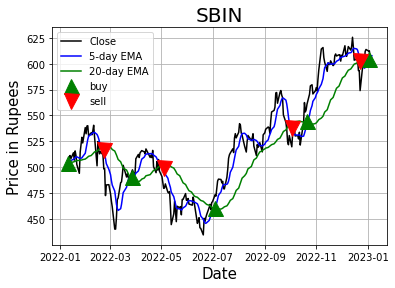

In [1]:
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import date
import matplotlib.pyplot as plt
data = get_history(symbol="SBIN", start=date(2022,1,10), end=date(2023,1,6))
#data[['Close']].plot()
df=data[['Close']]
df['5_SMA']=df['Close'].rolling(window=5,min_periods=1).mean()
df['5_EMA']=df['5_SMA'].ewm(span=5,adjust=False).mean()
df['20_SMA']=df['Close'].rolling(window=20,min_periods=1).mean()
df['20_EMA']=df['20_SMA'].ewm(span=20,adjust=False).mean()
df['Signal'] = 0.0
df['Signal'] = np.where(df['5_EMA'] > df['20_EMA'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
pd.set_option('display.max_rows', None)
df['Close'].plot(color = 'k', label= 'Close') 
df['5_EMA'].plot(color = 'b',label = '5-day EMA') 
df['20_EMA'].plot(color = 'g', label = '20-day EMA')
# plot ‘buy’ signals
plt.plot(df[df['Position'] == 1].index, 
         df['5_EMA'][df['Position'] == 1],
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(df[df['Position'] == -1].index, 
         df['5_EMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('SBIN', fontsize = 20)
plt.legend()
plt.grid()
plt.show()




In [2]:
RunningTotal=0.0
for index, row in df.iterrows():
  if row['Position'] == 0:
        row['RunningTotal']=RunningTotal
  if row['Position'] > 0:
        row['RunningTotal']=RunningTotal-row['Close']
        RunningTotal=row['RunningTotal']
  if row['Position'] < 0:
        row['RunningTotal']=RunningTotal+row['Close']
        RunningTotal=row['RunningTotal']
df

,Close,5_SMA,5_EMA,20_SMA,20_EMA,Signal,Position
Date,,,,,,,
2022-01-10,503.65,503.650000,503.650000,503.650000,503.650000,0.0,NaN
2022-01-11,505.95,504.800000,504.033333,504.800000,503.759524,1.0,1.0
2022-01-12,510.25,506.616667,504.894444,506.616667,504.031633,1.0,0.0
2022-01-13,511.35,507.800000,505.862963,507.800000,504.390525,1.0,0.0
2022-01-14,508.35,507.910000,506.545309,507.910000,504.725713,1.0,0.0
2022-01-17,514.00,509.980000,507.690206,508.925000,505.125645,1.0,0.0
2022-01-18,506.80,510.150000,508.510137,508.621429,505.458577,1.0,0.0
2022-01-19,515.80,511.260000,509.426758,509.518750,505.845260,1.0,0.0
2022-01-20,511.40,511.270000,510.041172,509.727778,506.215024,1.0,0.0
